In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

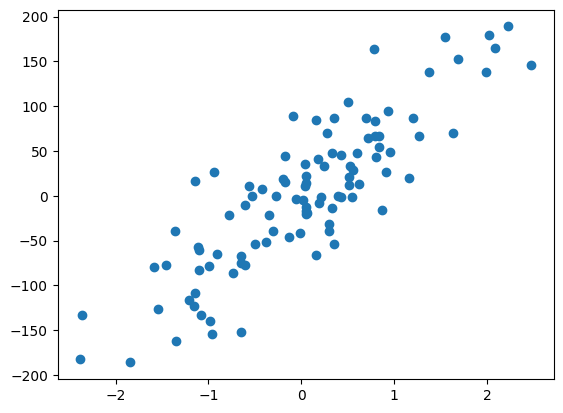

In [25]:
X, y = make_regression(n_samples=100,n_features=1,n_informative=1, n_targets=1,noise=50, random_state =4)
plt.scatter(X,y)

# Now lets start the linear regression 

In [58]:
class GDReg():
    def __init__(self,learning_rate,epochs,m,b):
        self.m = m
        self.b = b
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            #Applying Gradient Descent on loss function to calculate "m" and "b"
            loss_slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)    #Calculating slope wrt "b"
            self.b = self.b - (self.learning_rate*loss_slope_b)                      #(b new = b old - lr*slope_b)  Calculating b
            loss_slope_m = -2*np.sum((y-self.m*X.ravel()-self.b)*(X.ravel()))    #Calculating slope wrt "m"
            self.m = self.m - (self.learning_rate*loss_slope_m)                      #(b new = b old - lr*slope_b)  Calculating m
        return (self.m,self.b)

In [107]:
# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)

# Determine the split index
split_index = int(0.3 * len(X))

# Split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [108]:
# Using the GDReg
LR = GDReg(0.01,100,20,-10)

In [109]:
m ,b = LR.fit(X_train,y_train)

In [116]:
X_test_copy = X.copy

In [110]:
# Now prediction
y_pred = m*X_test.ravel()+b    # y = mx+b

ValueError: x and y must have same first dimension, but have shapes (30, 1) and (70,)

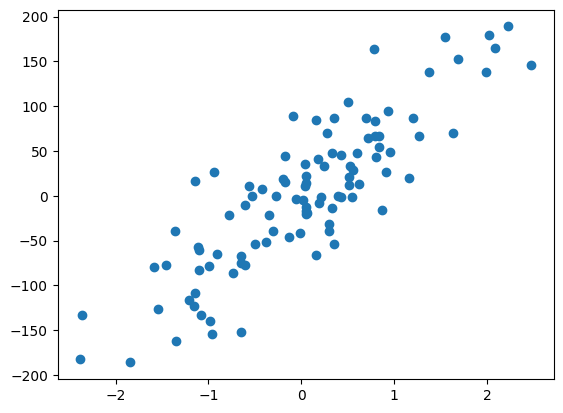

In [117]:
plt.scatter(X,y)
plt.plot(X_test,y_pred,color = 'red')

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=1,test_size= 0.3)

In [113]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [114]:
reg.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred_reg = reg.predict(X_test)

ValueError: x and y must have same first dimension, but have shapes (30, 1) and (70,)

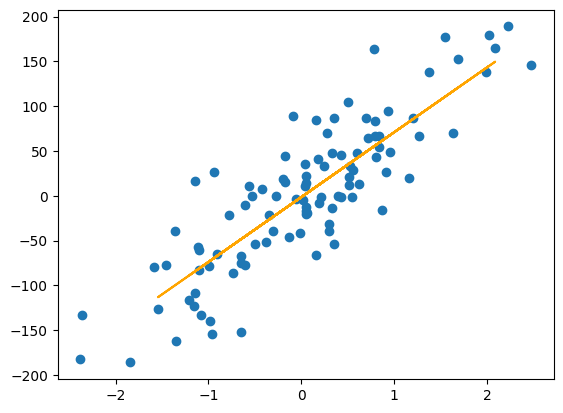

In [106]:
plt.scatter(X,y)
plt.plot(X_test,y_pred_reg,color = 'orange')
plt.plot(X_test,y_pred,color='red')